In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
PATH = 'billboard_trained/final_model.pt'

In [3]:
model = torch.load(PATH)

/home/ankush/.local/lib/python3.10/site-packages/torch/serialization.py:888: SourceChangeWarning: source code of class 'torch.nn.parallel.data_parallel.DataParallel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/ankush/.local/lib/python3.10/site-packages/torch/serialization.py:888: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/ankush/.local/lib/python3.10/site-packages/torch/serialization.py:888: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by acce

In [4]:
model.eval()

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [5]:
model.state_dict()

OrderedDict([('module.conv1.weight',
              tensor([[[[ 7.3996e-03,  6.7815e-03, -1.7507e-02,  ..., -4.2410e-02,
                         -4.4828e-02, -7.4611e-02],
                        [ 7.5607e-03,  1.2960e-03,  1.7655e-02,  ...,  1.8452e-03,
                         -2.0662e-02, -3.5832e-02],
                        [ 2.6347e-02,  1.9182e-02,  1.4109e-02,  ...,  1.0238e-01,
                          6.5637e-02,  6.0819e-02],
                        ...,
                        [ 6.7658e-03,  3.0915e-02, -5.6048e-03,  ..., -1.2312e-01,
                         -7.4519e-02,  1.2784e-02],
                        [ 2.0543e-02,  6.2815e-02,  7.6736e-02,  ...,  3.4444e-02,
                         -2.4095e-02, -1.1436e-02],
                        [-7.0607e-02, -2.4248e-02, -7.2414e-03,  ...,  4.2001e-02,
                          2.7711e-02,  3.0479e-03]],
              
                       [[-2.4148e-02,  5.8656e-03,  2.6106e-02,  ...,  5.8763e-02,
                         

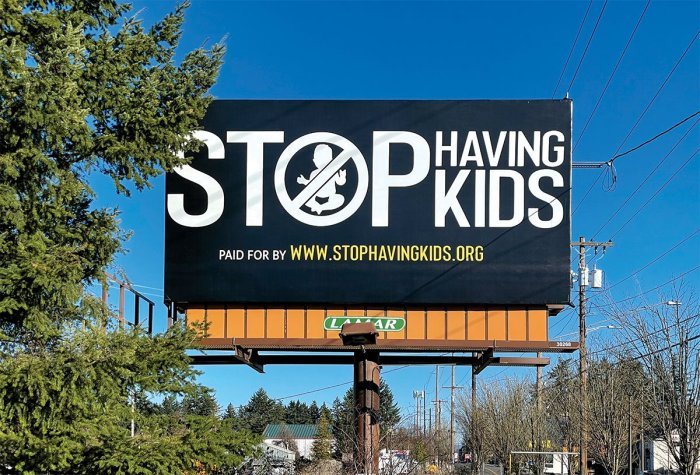

In [6]:
import torch

from torchvision import transforms

from PIL import Image


img = Image.open("resize-16807738931509482165AKHM3I2CDBG7RCROFUHFZVQEJQ.jpg")

img

In [7]:
convert_tensor = transforms.ToTensor()

img_tensor = convert_tensor(img).unsqueeze(0)

img_tensor.shape

torch.Size([1, 3, 475, 700])

In [8]:
model.eval()

with torch.inference_mode():
    tensor = model(img_tensor)
    
tensor

[tensor([1.0000], device='cuda:0'),
 tensor([0], device='cuda:0'),
 tensor([[169.7031,  93.1475, 574.2320, 312.5098]], device='cuda:0')]

In [9]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

In [10]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

In [11]:
bbox=tensor[2]
bbox[:,0]

tensor([169.7031], device='cuda:0')

In [15]:
img=read_image("resize-16807738931509482165AKHM3I2CDBG7RCROFUHFZVQEJQ.jpg")
img=draw_bounding_boxes(img, bbox, width=3, colors=(255,255,0))

In [16]:
img = torchvision.transforms.ToPILImage()(img)
img.show()